In [56]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,10)
plt.rcParams['figure.dpi'] = 500
import warnings
warnings.filterwarnings('ignore')

In [57]:
df = pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')
df

age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  num  
0       150  False      2.3  downsloping       fixed defect    0  
1       132  False      0.0         flat       fixed defect    0  
2       148  False      0.4         flat       fixed defect    0  
3       190  False      0.0         flat       fixed defect    0  
4       126   True      1.5         flat       fixed defect    0  
..      ...    ...      ...          ...                ...  ...  
903     120  False      1.5    upsloping  reversable defect    4  
904     120   True      3.0         flat  reversable defect    4  
905     123   True      2.5  downsloping             normal    4  
906     105   TURE      NaN  downsloping       fixed defect    4  
907     182  FALSE      NaN         flat  reversable defect    4  

[908 rows x 13 columns]

In [58]:
#Check for missing values
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [59]:
#Check data tpyes
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [60]:
# Check for data types or typos in Categorical columns
df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [61]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [62]:
df['cp'].unique()

array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)

In [63]:
df['fbs'].unique()

array([ True, False])

In [64]:
df['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [65]:
df['slope'].unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

In [66]:
df['thal'].unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

Repalce the categorical variables with numerical values

In [67]:
# Encoding
df['sex'].replace({'Male':1,'Female':0}, inplace=True)
df['fbs'].replace({True:1,False:0}, inplace=True)
df['exang'].replace({True:1,False:0,'TURE':1,'FALSE':0}, inplace=True)

In [68]:
# Based on some research, we can encode the cp column as below based on the intensity/severity
df['cp'].replace({'typical angina':0, 'atypical angina':1, 'asymptomatic':3, 'non-anginal':2}, inplace=True)

In [69]:
df['restecg'].replace({'lv hypertrophy':2, 'normal':0, 'st-t abnormality':1}, inplace=True)

In [70]:
df['slope'].replace({'downsloping':2, 'flat':1, 'upsloping':0}, inplace=True)

In [71]:
df['thal'].replace({'fixed defect':1, 'normal':0, 'reversable defect':2}, inplace=True)

In [72]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalch        int64
exang         int64
oldpeak     float64
slope         int64
thal          int64
num           int64
dtype: object

In [73]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2     150      0      2.3      2   
1   41    1   1       135   203    0        0     132      0      0.0      1   
2   57    1   3       140   192    0        0     148      0      0.4      1   
3   52    1   0       118   186    0        2     190      0      0.0      1   
4   57    1   3       110   201    0        0     126      1      1.5      1   

   thal  num  
0     1    0  
1     1    0  
2     1    0  
3     1    0  
4     1    0

In [74]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [75]:
# Descriptive statistics
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  908.000000  908.000000  908.000000  908.000000  908.000000  908.000000   
mean    53.791850    0.790749    2.264317  133.430617  201.484581    0.203744   
std      9.158031    0.406998    0.925305   20.401608  112.097949    0.403003   
min     29.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%     47.750000    1.000000    2.000000  120.000000  176.750000    0.000000   
50%     54.000000    1.000000    3.000000  130.000000  224.000000    0.000000   
75%     60.000000    1.000000    3.000000  144.000000  270.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  603.000000    1.000000   

          restecg      thalch       exang     oldpeak       slope        thal  \
count  908.000000  908.000000  908.000000  846.000000  908.000000  908.000000   
mean     0.609031  135.957048    0.410793    0.891253    0.844714    0.955947   
std      0.806674   26.804929    0.492249    1.093875    0.691023    0.897281   
min      0.000000   60.000000    0.000000   -2.600000    0.000000    0.000000   
25%      0.000000  118.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000  138.000000    0.000000    0.500000    1.000000    1.000000   
75%      1.000000  156.000000    1.000000    1.500000    1.000000    2.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    2.000000   

              num  
count  908.000000  
mean     1.008811  
std      1.144436  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      4.000000

In [76]:
# % of missing values in oldpeak
(908-846)*100/908

6.828193832599119

In [77]:
# Replace the missing values with the median as the distribution is not normal
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)

In [78]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [79]:
# Check duplicated rows
df[df.duplicated(keep=False)]

age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  \
764   58    1   2       150   219    0        1     118      1      0.0   
765   58    1   2       150   219    0        1     118      1      0.0   

     slope  thal  num  
764      2     0    2  
765      2     0    2

In [80]:
# Drop record 764
df.drop(index=764,inplace=True)

In [81]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalch  exang  oldpeak  \
0     63    1   0       145   233    1        2     150      0      2.3   
1     41    1   1       135   203    0        0     132      0      0.0   
2     57    1   3       140   192    0        0     148      0      0.4   
3     52    1   0       118   186    0        2     190      0      0.0   
4     57    1   3       110   201    0        0     126      1      1.5   
..   ...  ...  ..       ...   ...  ...      ...     ...    ...      ...   
903   53    1   3       125     0    0        0     120      0      1.5   
904   62    1   3       166   170    0        1     120      1      3.0   
905   56    1   2       170     0    0        2     123      1      2.5   
906   56    1   2       144   208    1        1     105      1      0.5   
907   57    1   3       142   277    1        1     182      0      0.5   

     slope  thal  num  
0        2     1    0  
1        1     1    0  
2        1     1    0  
3        1     1    0  
4        1     1    0  
..     ...   ...  ...  
903      0     2    4  
904      1     2    4  
905      2     0    4  
906      2     1    4  
907      1     2    4  

[907 rows x 13 columns]

# EDA

<Axes: >

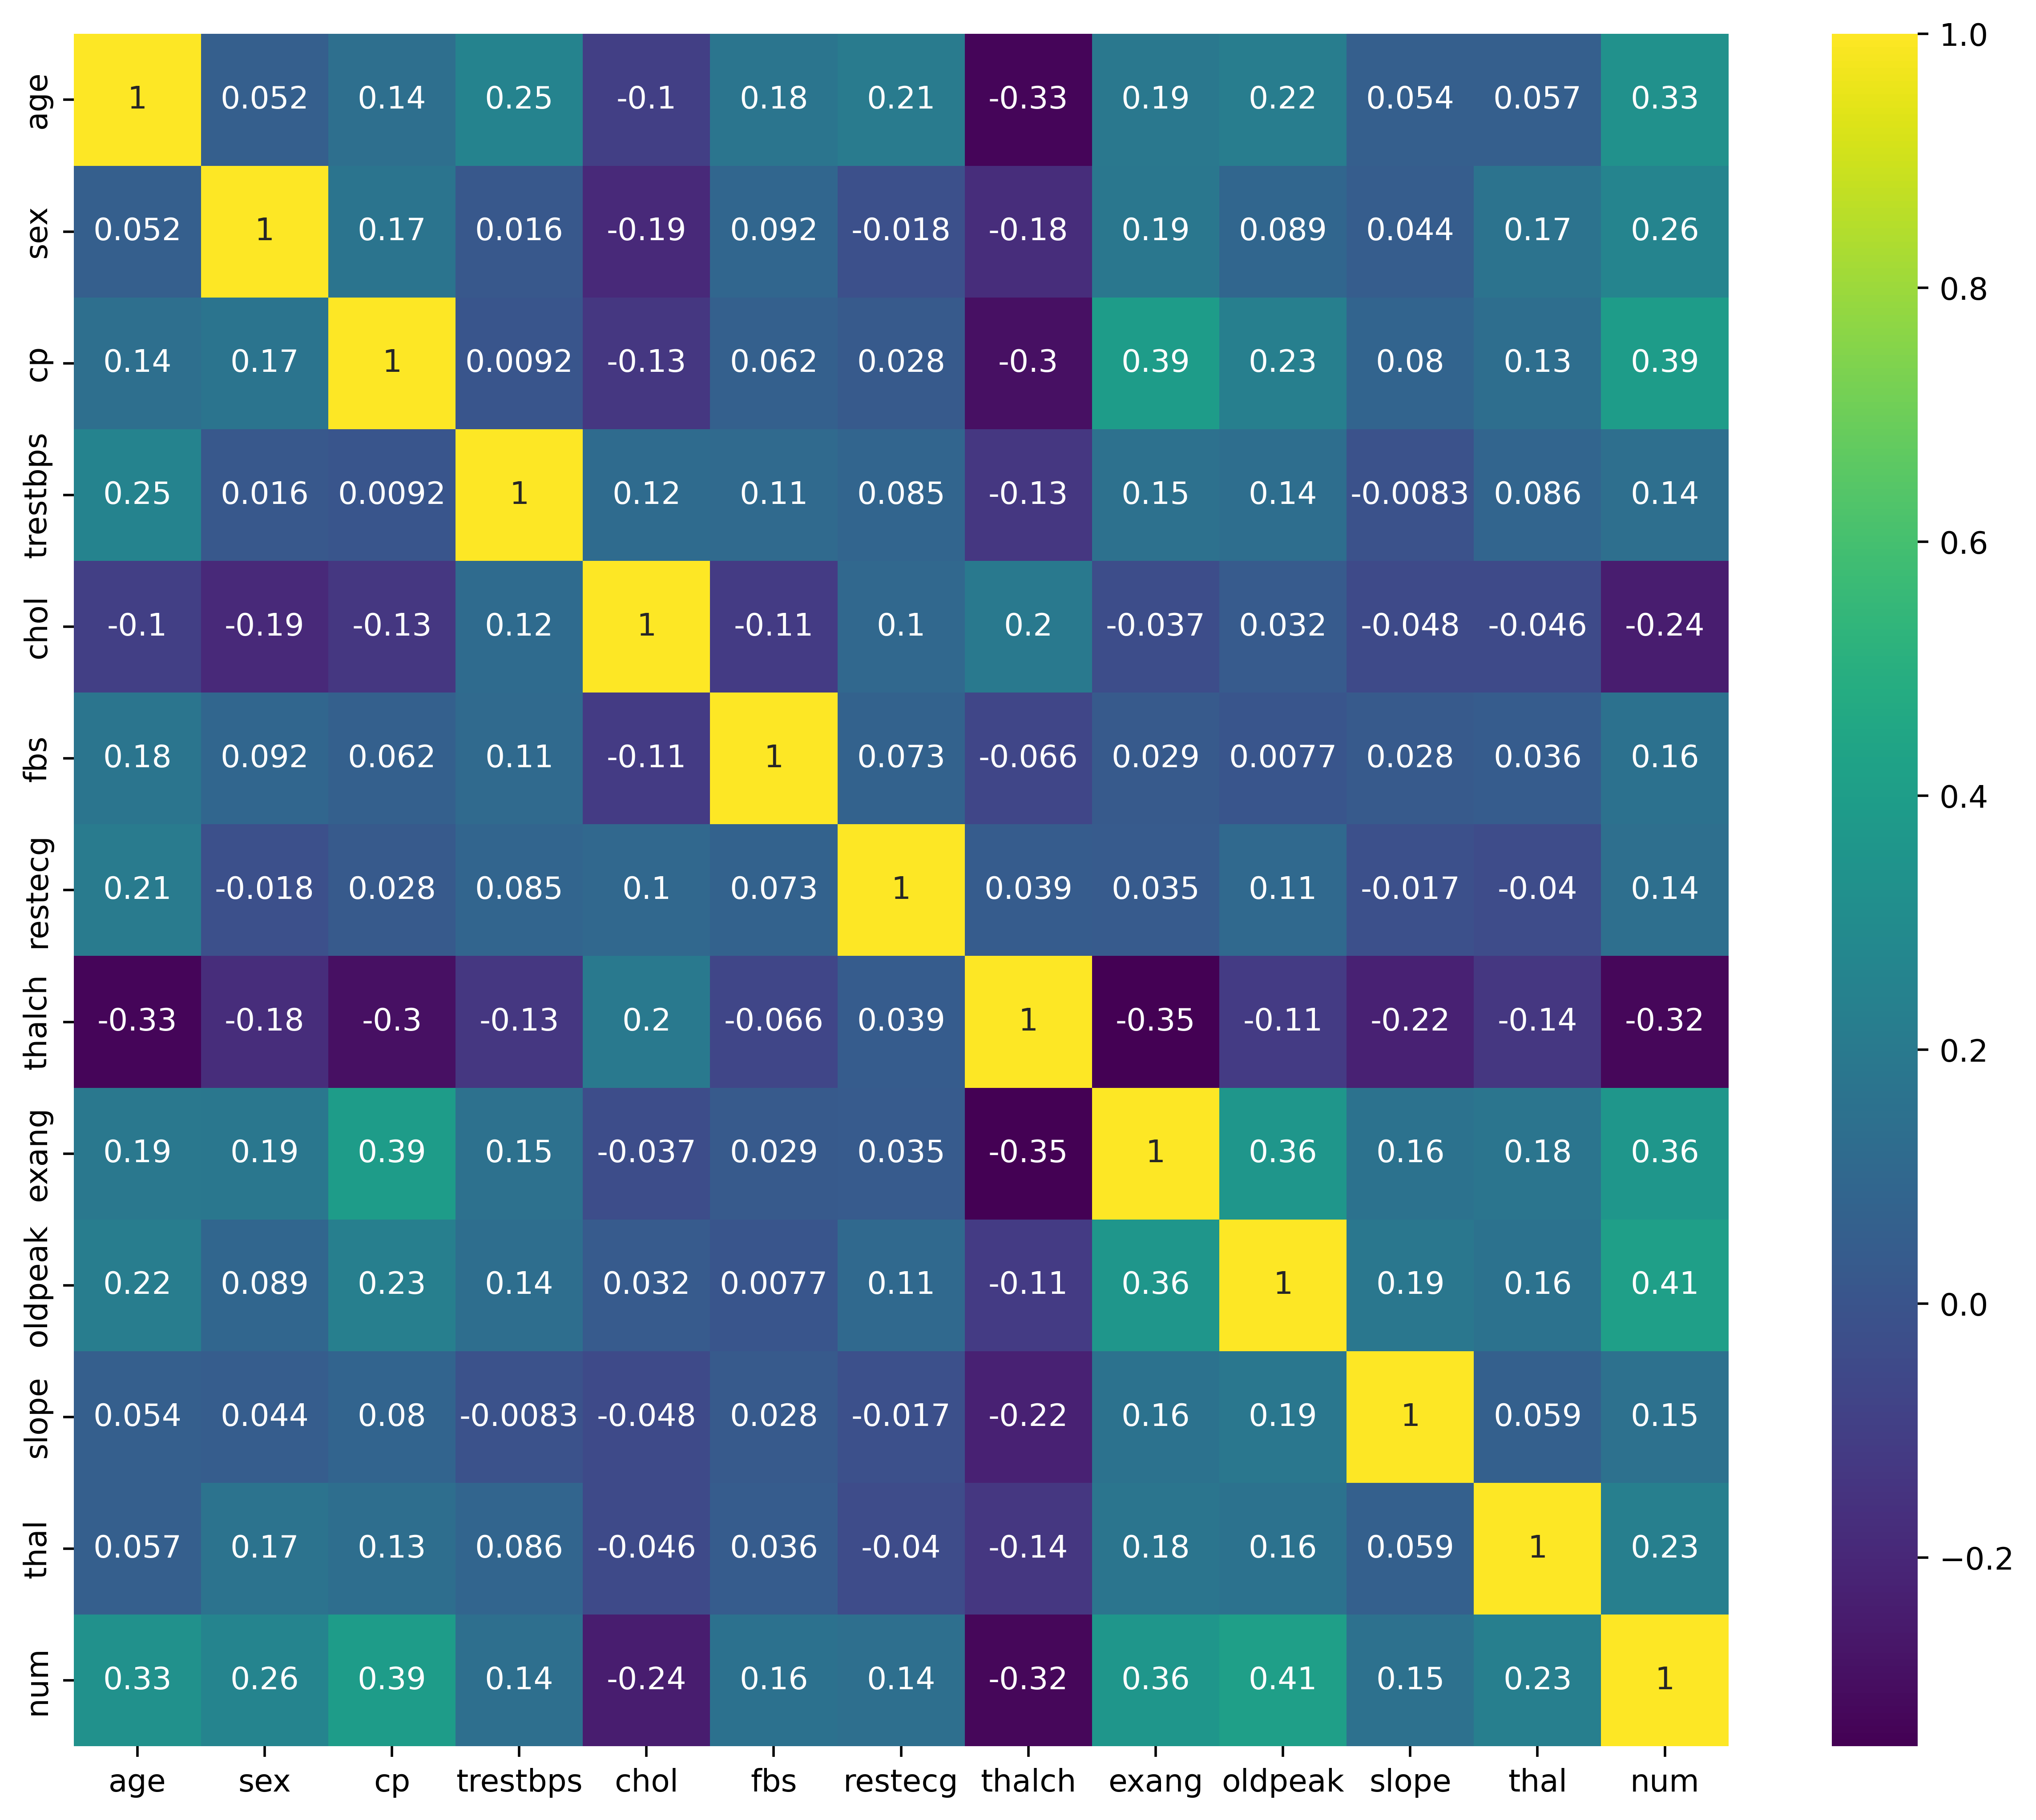

In [82]:
# Correlation
sns.heatmap(df.corr(), annot=True, cmap='viridis')

<Axes: >

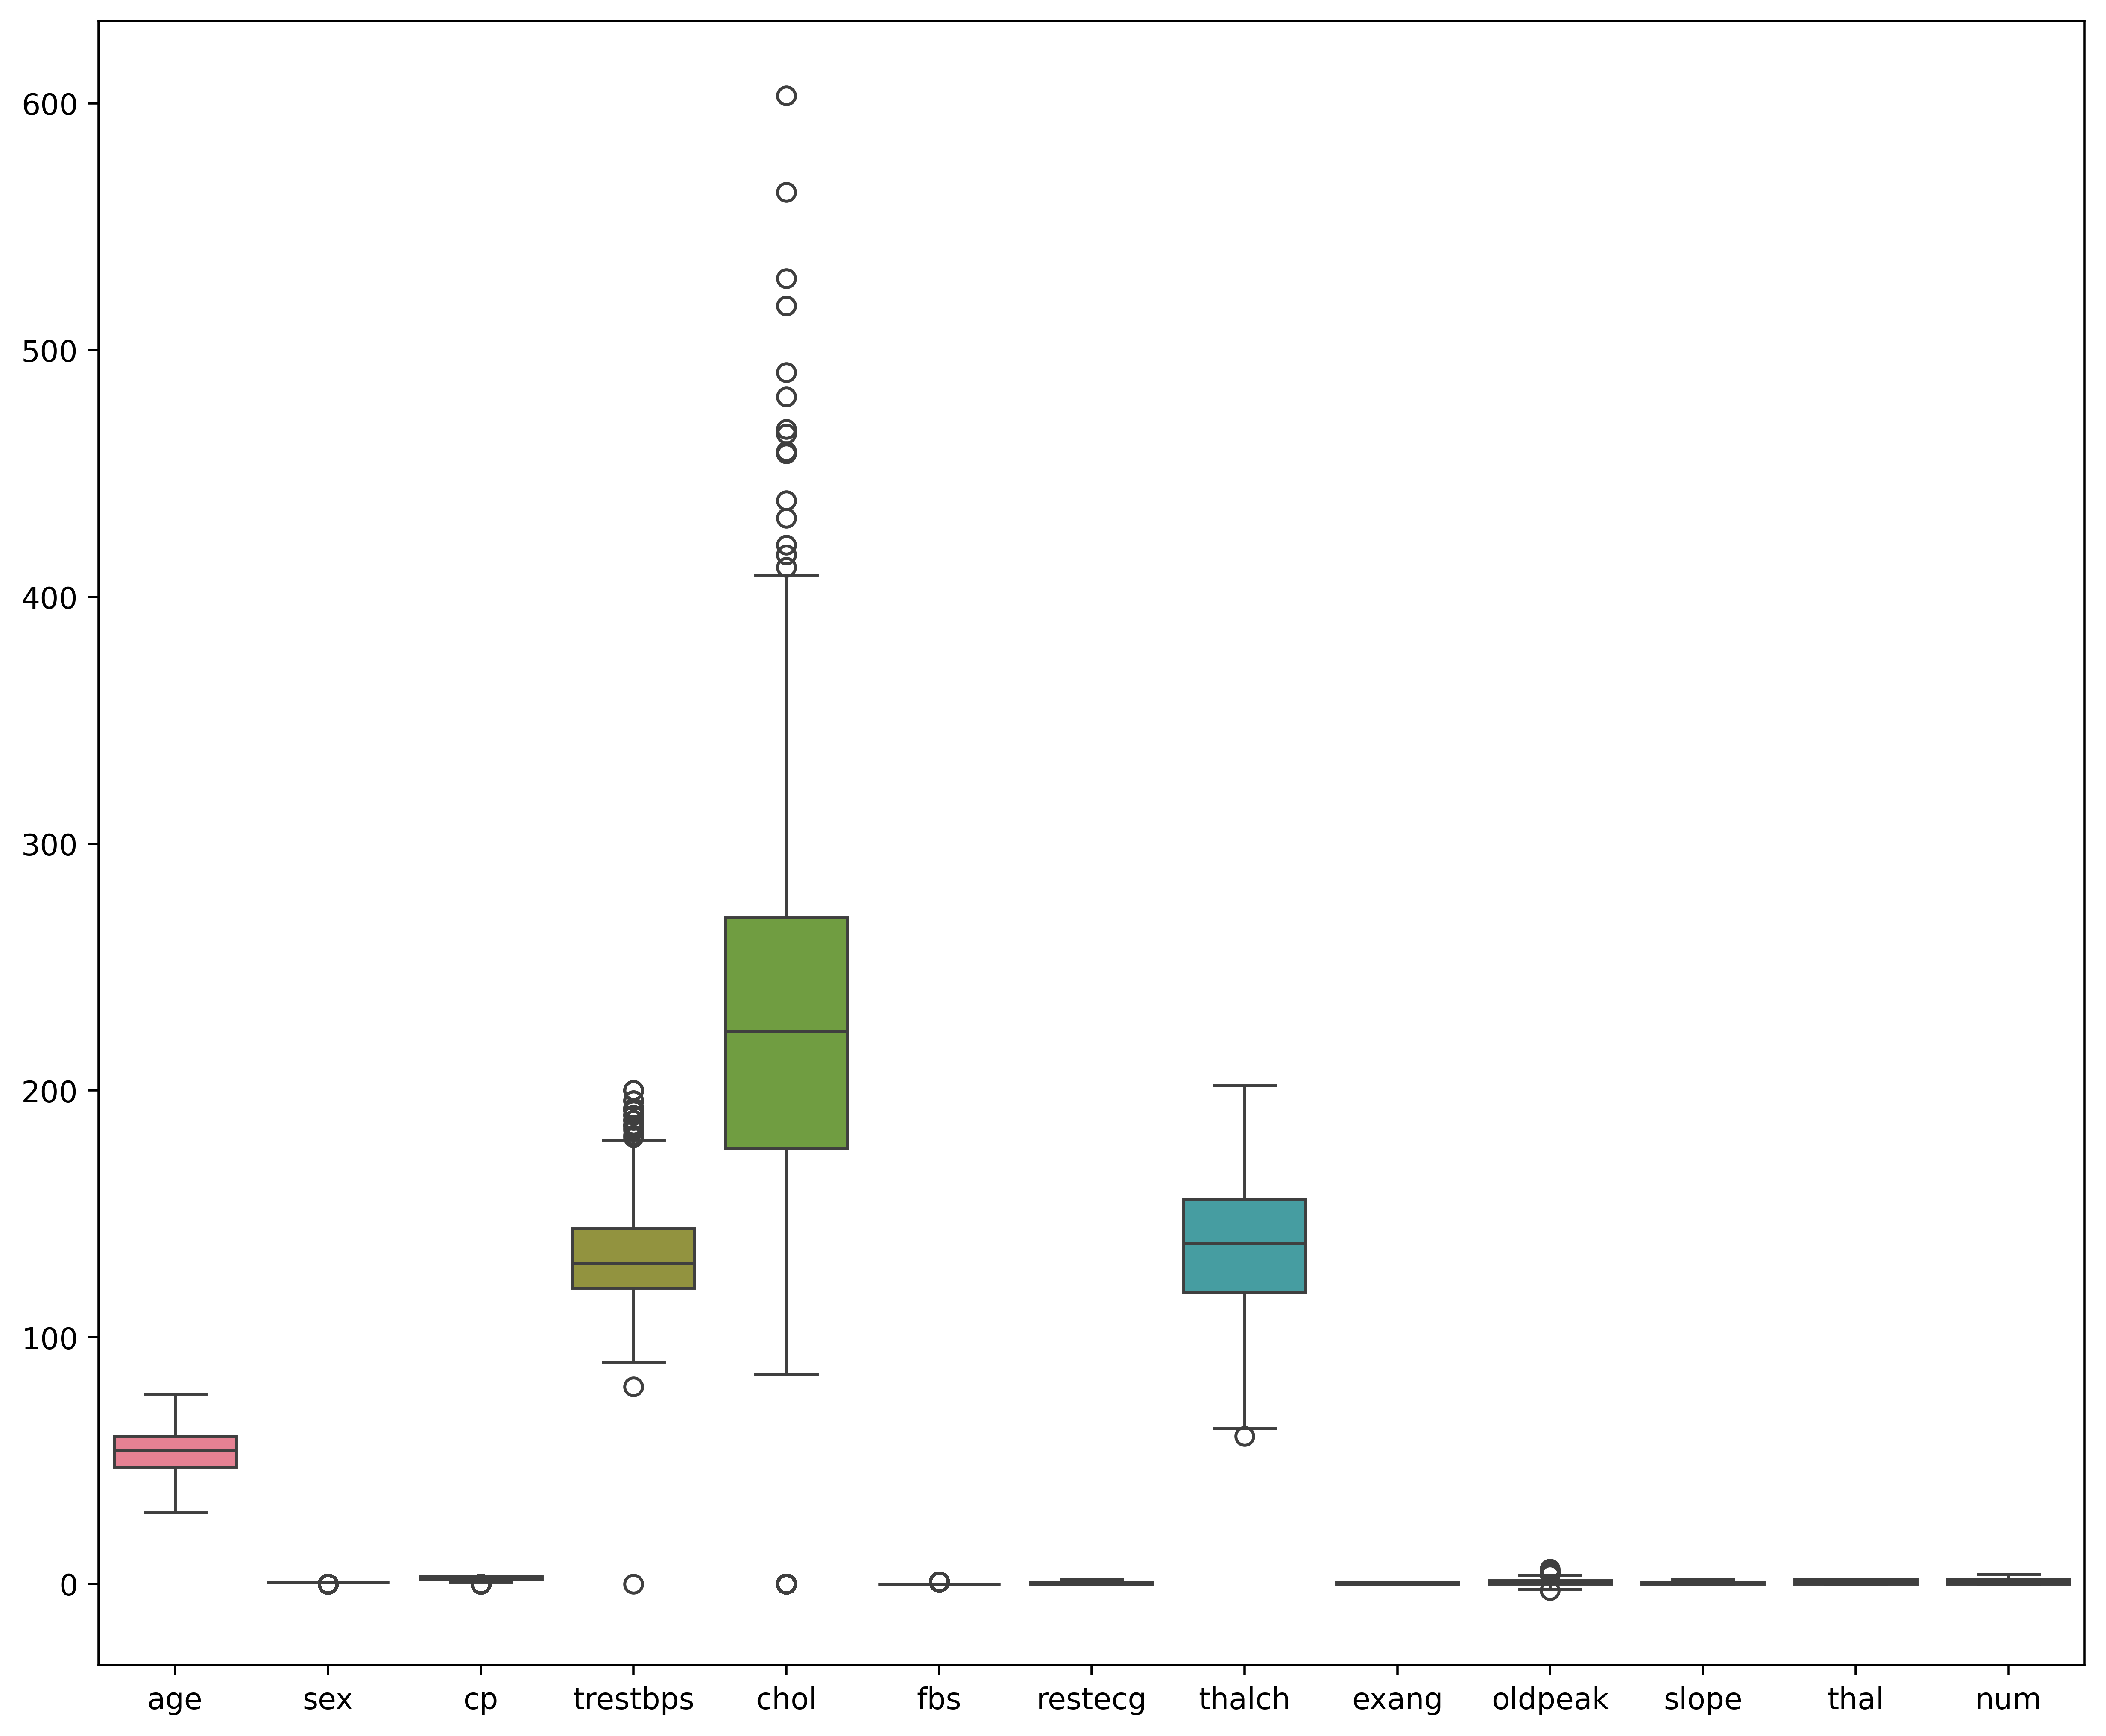

In [86]:
# Boxplot of all columns
sns.boxplot(df)

In [87]:
# Scatter plot of all features
sns.pairplot(df , palette='viridis')

# Model Building

In [88]:
# Split data set in to train and test sets

from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(df.iloc[:,:-1] , df['num'] , test_size=0.2 , random_state=1)

### **C5.0 algorithm**

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
# Create a Decision Tree model
dt50 = DecisionTreeClassifier(criterion='entropy') # criterion='entropy' indicates this is a C5.0 algorithm

dt50.fit(xtrain,ytrain)
ypred = dt50.predict(xtest)

In [93]:
# Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

In [98]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.62      0.65      0.64        81
           1       0.26      0.29      0.27        49
           2       0.29      0.30      0.29        20
           3       0.15      0.11      0.12        28
           4       0.00      0.00      0.00         4

    accuracy                           0.42       182
   macro avg       0.26      0.27      0.27       182
weighted avg       0.40      0.42      0.41       182



In [95]:
confusion_matrix(ytest,ypred)

array([[53, 18,  5,  5,  0],
       [24, 14,  5,  5,  1],
       [ 1,  6,  6,  6,  1],
       [ 7, 14,  3,  3,  1],
       [ 0,  1,  2,  1,  0]], dtype=int64)

Accuracy of the model is 42% which needs to be improved by hyperparameter tuning

In [96]:
# Training accuracy
dt50.score(xtrain,ytrain)

1.0

In [97]:
# Testing accuracy
dt50.score(xtest,ytest)

0.4175824175824176

The model is highly overfitted. Let us look at hyperparameter tuning methods to improve the testing accuracy.

### C5.0 hyperparameter tuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [106]:
params = {
    'criterion' : ['entropy'],                           # C5.0
    'max_depth' : [3,5,7,9,11],                          # No of decision nodes
    'splitter' : ['best','random']                       # 'best' uses the best value of RSS, 'random' selects any value
}

In [107]:
# Create a varaiable and store the best model
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, verbose=1)

In [108]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy'],
                         'max_depth': [3, 5, 7, 9, 11],
                         'splitter': ['best', 'random']},
             verbose=1)

In [111]:
#  Find the best parameters
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}

In [112]:
# Create a new model with the parameters 
dt50 = DecisionTreeClassifier(criterion='entropy',max_depth=3,splitter='random')

dt50.fit(xtrain,ytrain)
ypred = dt50.predict(xtest)

In [116]:
# Training accuracy
dt50.score(xtrain,ytrain)

0.576551724137931

In [114]:
# Testing accuracy
dt50.score(xtest,ytest)

0.554945054945055

In [ ]:
# Classifcation report
print(classification_report(ytest,ypred))

The accuracy of the model is 55% now after hyperparameter tuning, which is better than the previous score. But yet this accuracy is not good for a model to be usable.

## **CART Classifcation**

In [130]:
# Create CART model
dtc = DecisionTreeClassifier(criterion='gini')

dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)

In [135]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.66      0.75      0.71        81
           1       0.38      0.37      0.37        49
           2       0.26      0.25      0.26        20
           3       0.35      0.25      0.29        28
           4       0.00      0.00      0.00         4

    accuracy                           0.50       182
   macro avg       0.33      0.32      0.33       182
weighted avg       0.48      0.50      0.49       182



Accuracy with default parameters is 50%

In [136]:
# Hyperparameter tuning
params = {
    'criterion' : ['gini'],
    'max_depth' : [3,5,7,9,11],
    'splitter' : ['best','random']
}

In [137]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params,verbose=1)

In [138]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [3, 5, 7, 9, 11],
                         'splitter': ['best', 'random']},
             verbose=1)

In [139]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}

In [175]:
# Create a new CART model
dtc = DecisionTreeClassifier(criterion='gini',max_depth=5,splitter='random')

dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)

In [176]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        81
           1       0.39      0.51      0.44        49
           2       0.27      0.20      0.23        20
           3       0.33      0.07      0.12        28
           4       0.00      0.00      0.00         4

    accuracy                           0.53       182
   macro avg       0.33      0.32      0.30       182
weighted avg       0.48      0.53      0.49       182



In [177]:
dtc.score(xtrain,ytrain) , dtc.score(xtest,ytest)

(0.6344827586206897, 0.5274725274725275)

# Visualize the tree from C5.0

In [178]:
from sklearn import tree

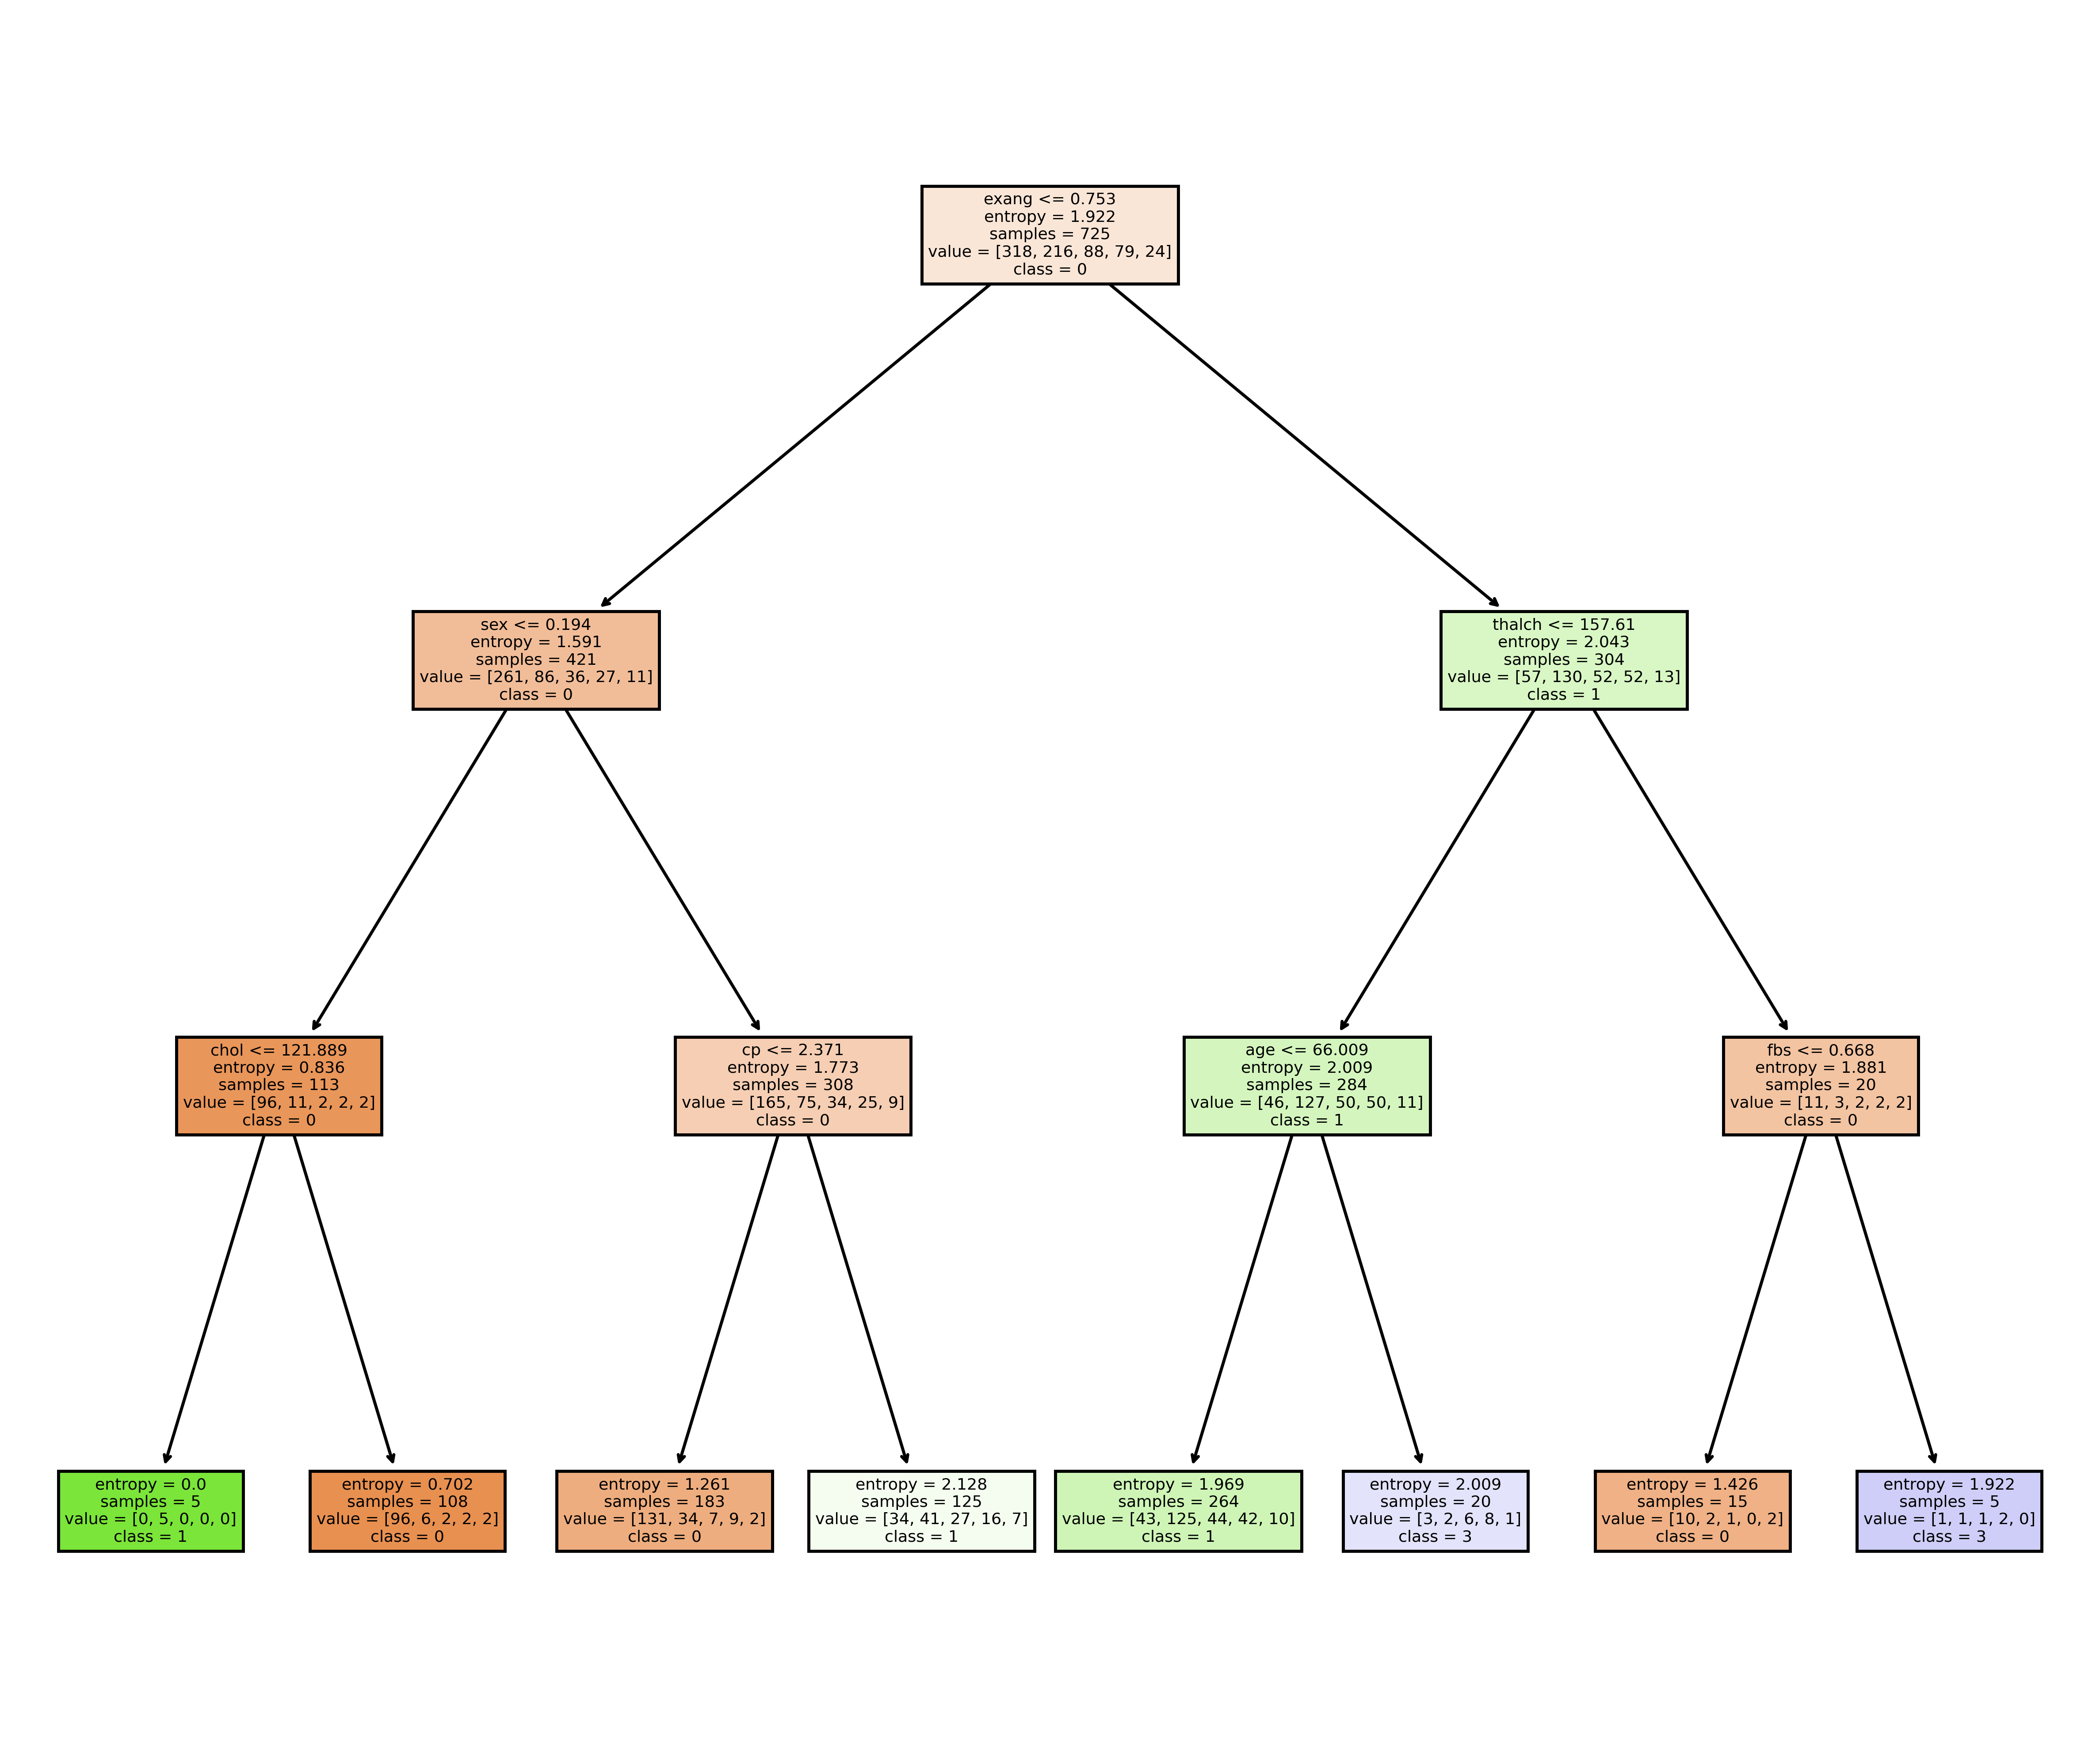

In [184]:
tree.plot_tree(dt50, feature_names=df.iloc[:,:-1].columns, class_names=[str(i) for i in df['num'].unique()], filled=True)
plt.show()

In [185]:
# Information Gain in C5.0 model
dt50.feature_importances_

array([0.04567889, 0.12692924, 0.21322676, 0.        , 0.08086036,
       0.02883677, 0.        , 0.05633351, 0.44813447, 0.        ,
       0.        , 0.        ])

In [186]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

Exang column has the highest I.G. Columns like trestbps, restecg, oldpeak, slope and thal have 0 I.G. which means they do not contribute to the target column at all.

# Visualize the tree from CART 

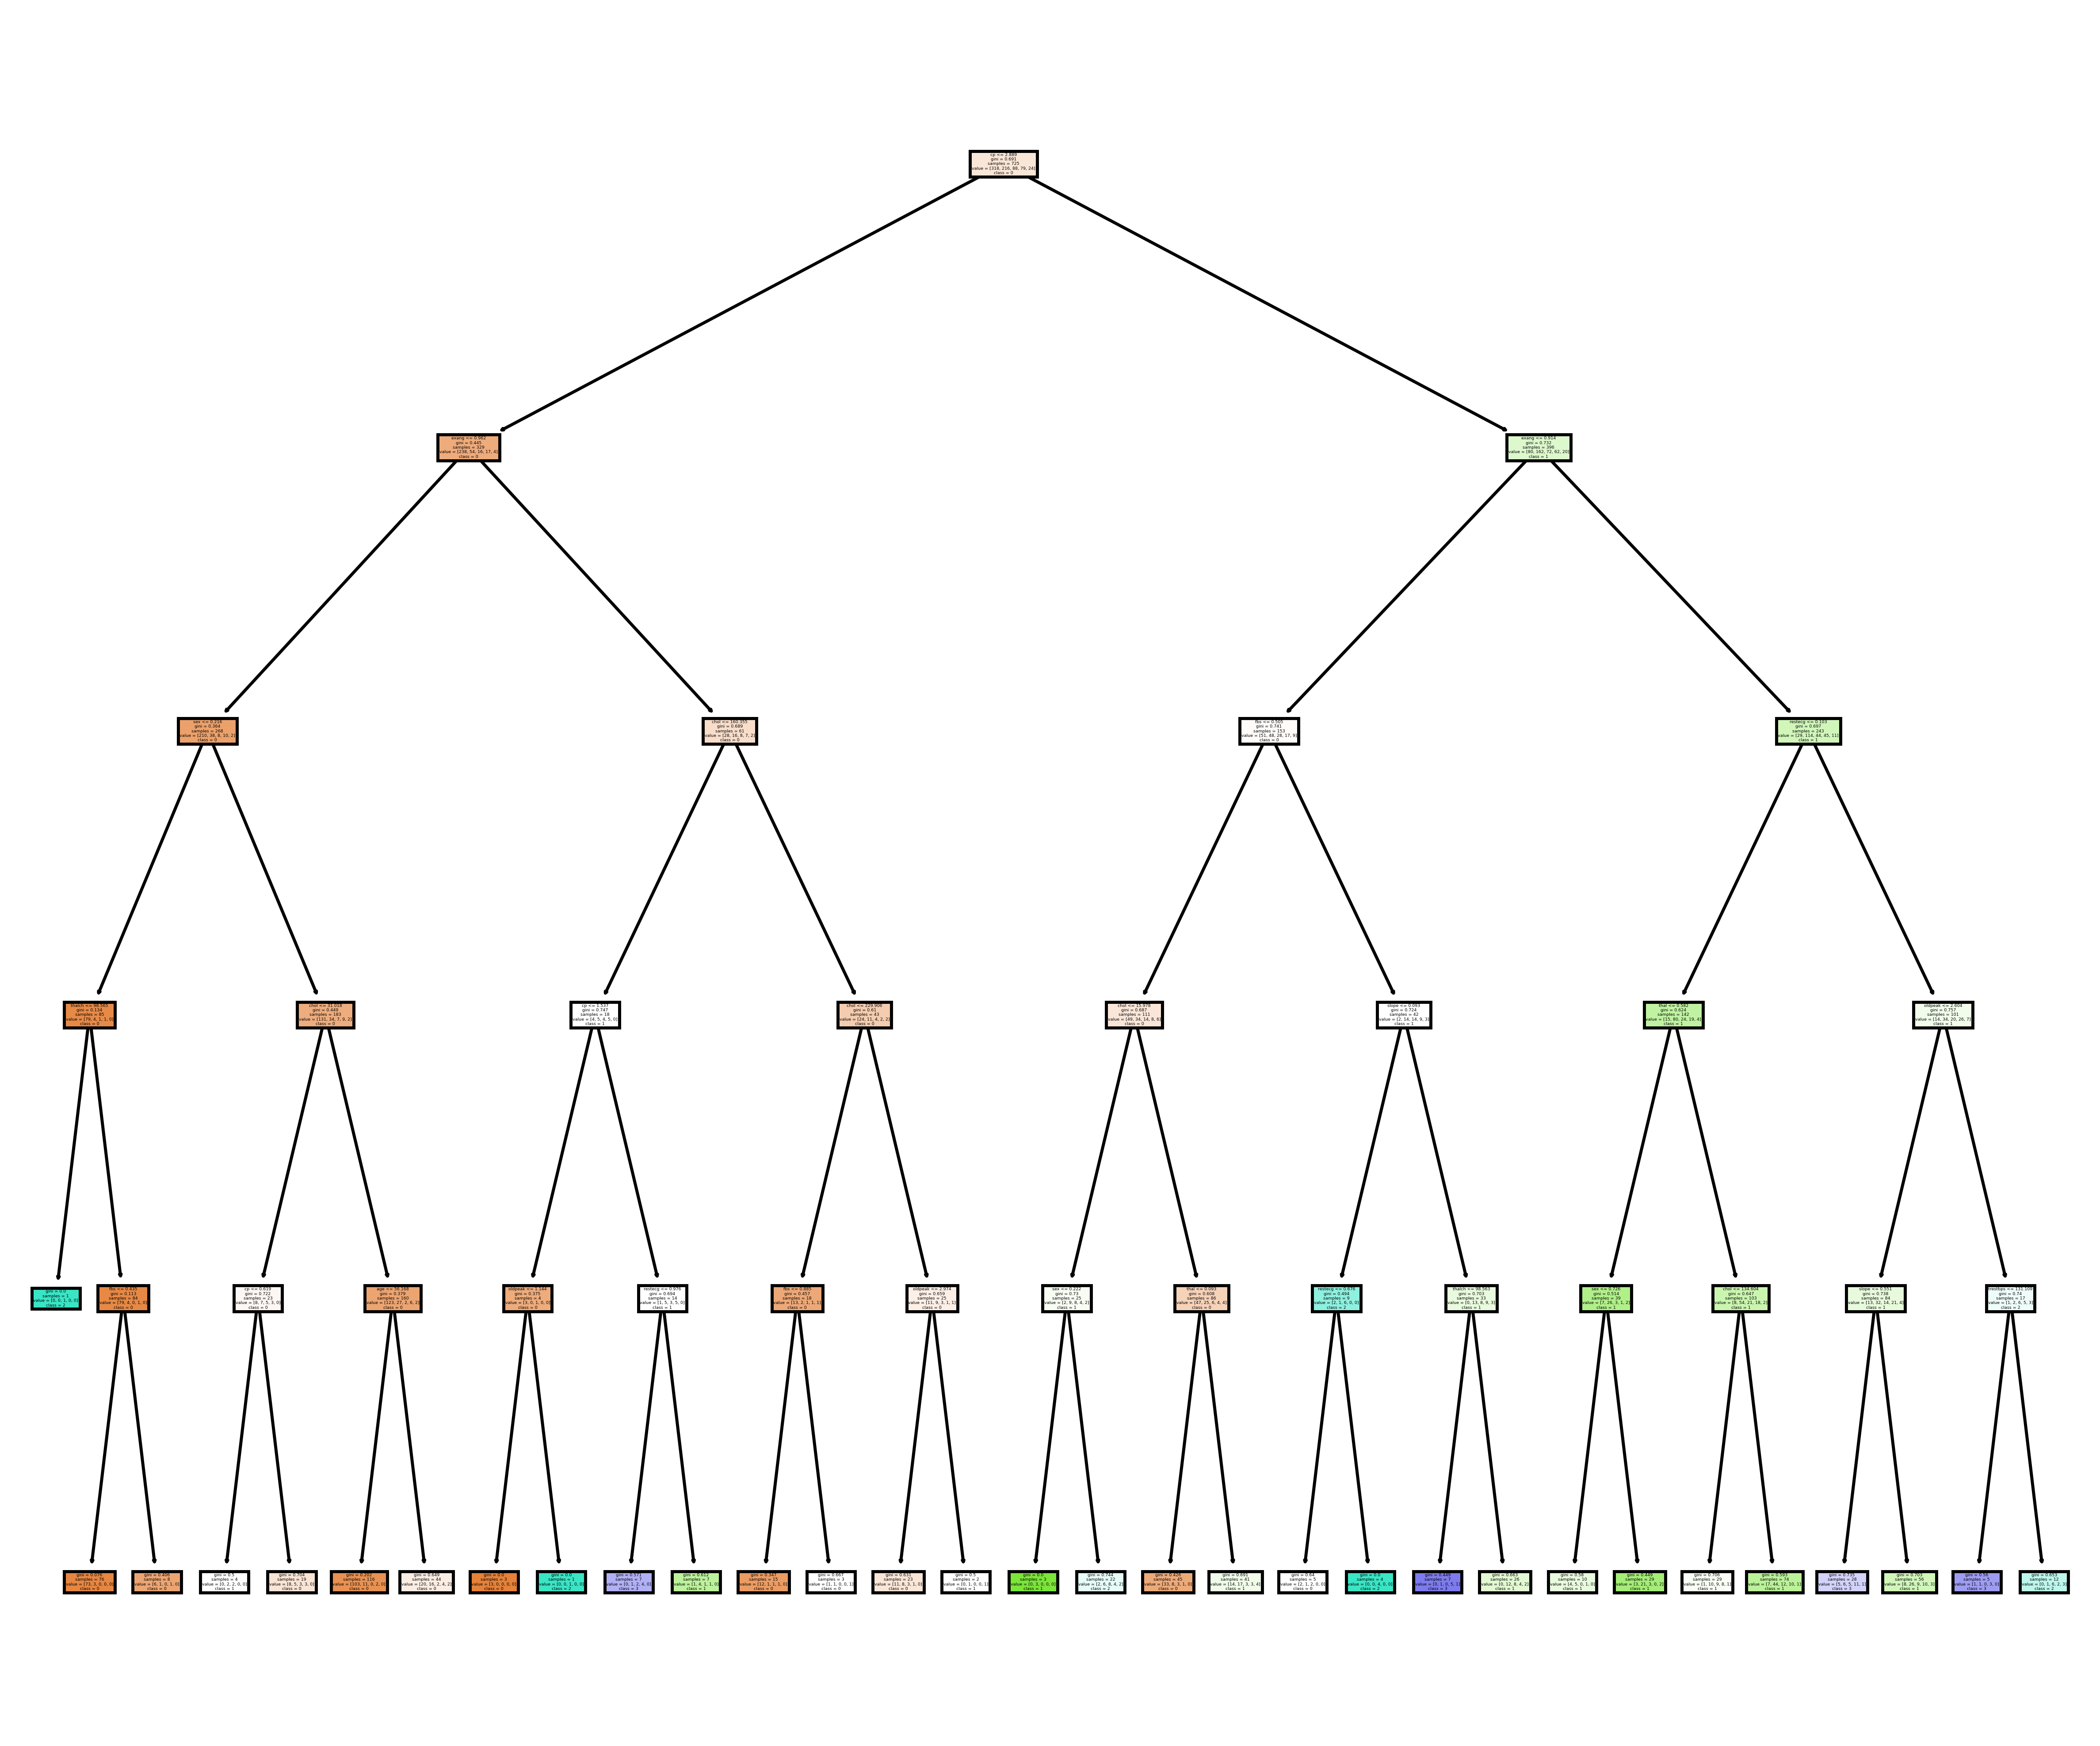

In [187]:
tree.plot_tree(dtc, feature_names=df.iloc[:,:-1].columns, class_names=[str(i) for i in df['num'].unique()], filled=True)
plt.show()

In [188]:
# Information Gain in CART model
dtc.feature_importances_

array([0.05641554, 0.04582246, 0.44949185, 0.01282177, 0.11075538,
       0.0537223 , 0.04475203, 0.03084726, 0.09113687, 0.02834353,
       0.03168894, 0.04420207])

In [189]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In CART model, cp column has the highest I.G. value seconded by chol column

## Interview questions

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Ans - The most common hyperparameters used for a Decision Tree are criterion, maximum depth and splitter.
1) The criterion parameter determines the quality of the split by using Gini impurity or entropy for information gain.
   - Gini - measures the probablility that a randomly chosen sample in a node would be incorrectly labelled if it was labelled by the distribution of samples in the node.
   - Entropy - Measure of randomness in the data.
2) Maximum depth - This parameter limits the maximum depth (decision nodes) of the tree. Larger values can result in overfitted Trees.
3) Splitter - This denoted the strategy used to split at each node.
   - 'best' - chooses the best value based on RSS.
   - 'random' - select any variable as root/decision node.

2. What is the difference between the Label encoding and One-hot encoding?

- Label encoding assigns positive numbers for all the categorical values within a feature/column. Example - if a column named 'Country' has values 'India', 'Germany', 'France', then label encoding assigns values for India as 0, Germany as 1 and France as 2.
- One-Hot encoding creates new binary columns for each category in a categorical feature. For a column with categories 'India', 'Germany', 'France', the One-Hot encoder will assign values as
  - India - [1,0,0]
  - Germany - [0,1,0]
  - France - [0,0,1]
- Label encoder is suitable when the order of the categories are meaningful. One-Hot encoding is suitable where the categories do not have a meaningful order.